<a href="https://colab.research.google.com/github/Teerawa-ctrl/Computer_Vision/blob/main/Lab2_2_Spatial_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Teemo_TurnTable_img.jpg to Teemo_TurnTable_img (2).jpg


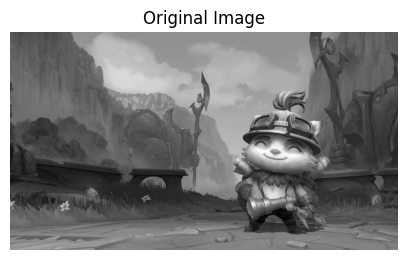

In [ ]:
from google.colab import files
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Step 1: Upload and Load Image
# Upload the image
uploaded = files.upload()

# Load the image
file_name = list(uploaded.keys())[0]
img = Image.open(file_name).convert('L')  # Convert image to grayscale
img_array = np.array(img)

# Display the original image
plt.figure(figsize=(5, 5))
plt.title("Original Image")
plt.imshow(img_array, cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
1# Step 2: Get user input for kernel and stride
kernel_size = int(input("Enter the kernel size (e.g., 3 for 3x3): "))
stride = int(input("Enter the stride (e.g., 1, 2): "))

Enter the kernel size (e.g., 3 for 3x3): 3
Enter the stride (e.g., 1, 2): 1


In [ ]:
# Step 3: Define the Convolution Function
def spatial_filtering(image, kernel, stride):
    """Apply convolution with a given kernel and stride."""
    img_h, img_w = image.shape
    kernel_h, kernel_w = kernel.shape

    # Calculate output dimensions
    out_h = (img_h - kernel_h) // stride + 1
    out_w = (img_w - kernel_w) // stride + 1

    # Initialize the output array
    output = np.zeros((out_h, out_w))

    # Perform convolution
    for i in range(0, out_h):
        for j in range(0, out_w):
            # Extract the current window
            start_i = i * stride
            start_j = j * stride
            window = image[start_i:start_i + kernel_h, start_j:start_j + kernel_w]

            # Element-wise multiplication and summation
            output[i, j] = np.sum(window * kernel)

    return output

In [ ]:
# Step 4: Create a kernel
print(f"Enter the {kernel_size}x{kernel_size} kernel values (space-separated):")
kernel = []
for _ in range(kernel_size):
    row = list(map(float, input().split()))
    kernel.append(row)
kernel = np.array(kernel)

Enter the 3x3 kernel values (space-separated):
0 0 0
0 -4 1
0 1 0


In [ ]:
# Step 5: Apply the spatial filtering
filtered_image = spatial_filtering(img_array, kernel, stride)

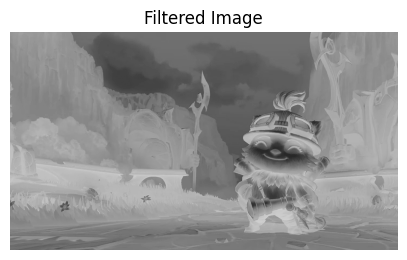

In [ ]:
# Step 6: Display the filtered image
plt.figure(figsize=(5, 5))
plt.title("Filtered Image")
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')
plt.show()